# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing our data

In [2]:
movie = pd.read_csv('../input/movielens-20m-dataset/movie.csv',index_col=False)
rating = pd.read_csv('../input/movielens-20m-dataset/rating.csv')

# Let's take a look at our data

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
movie.shape, rating.shape

((27278, 3), (20000263, 4))

In [6]:
rating.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userId,2.00003e+07,NaN,NaN,NaN,69045.9,40038.6,1,34395,69141,103637,138493
movieId,2.00003e+07,NaN,NaN,NaN,9041.57,19789.5,1,902,2167,4770,131262
rating,2.00003e+07,NaN,NaN,NaN,3.52553,1.05199,0.5,3,3.5,4,5
timestamp,20000263,15351121,1996-03-01 00:00:00,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
movie.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
movieId,27278,NaN,NaN,NaN,59855.5,44429.3,1,6931.25,68068,100293,131262
title,27278,27262,"Girl, The (2012)",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,27278,1342,Drama,4520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merging our Dataset

In [8]:
data = pd.merge(movie, rating, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


In [9]:
data.shape

(20000263, 6)

In [10]:
data.nunique()

movieId         26744
title           26729
genres           1329
userId         138493
rating             10
timestamp    15351121
dtype: int64

In [11]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


How recommendation system work?

Simple solution is recommending product based on ratings from previous users. 

Let's say a customer like Movie A so we can recommend him Movie's with Similiar rating.

# Now lets calulate Average Rating

In [12]:
avg_rating = data.groupby('title')['rating'].mean()
avg_rating

title
#chicagoGirl: The Social Network Takes on a Dictator (2013)    3.666667
$ (Dollars) (1971)                                             2.833333
$5 a Day (2008)                                                2.871795
$9.99 (2008)                                                   3.009091
$ellebrity (Sellebrity) (2012)                                 2.000000
                                                                 ...   
À propos de Nice (1930)                                        3.125000
Árido Movie (2005)                                             2.000000
Åsa-Nisse - Wälkom to Knohult (2011)                           1.500000
Üvegtigris (2001)                                              3.000000
貞子3D (2012)                                                    1.500000
Name: rating, Length: 26729, dtype: float64

In [13]:
avg_rating.sort_values(ascending=False)

title
Codes of Gender, The (2010)                    5.0
Poison (1951)                                  5.0
Barchester Chronicles, The (1982)              5.0
Prom Queen: The Marc Hall Story (2004)         5.0
Argentina latente (2007)                       5.0
                                              ... 
Dr. Moreau's House of Pain (2004)              0.5
Late Great Planet Earth, The (1979)            0.5
Last Warrior, The (Last Patrol, The) (2000)    0.5
Barbie: A Perfect Christmas (2011)             0.5
Quest for a Heart (Röllin sydän) (2007)        0.5
Name: rating, Length: 26729, dtype: float64

# Calculating Total Ratings given by users

In [14]:
total_rating = data.groupby('title')['rating'].count()
total_rating

title
#chicagoGirl: The Social Network Takes on a Dictator (2013)     3
$ (Dollars) (1971)                                             24
$5 a Day (2008)                                                39
$9.99 (2008)                                                   55
$ellebrity (Sellebrity) (2012)                                  2
                                                               ..
À propos de Nice (1930)                                         4
Árido Movie (2005)                                              1
Åsa-Nisse - Wälkom to Knohult (2011)                            2
Üvegtigris (2001)                                               1
貞子3D (2012)                                                     1
Name: rating, Length: 26729, dtype: int64

# Now creating a DataFrame of both Average rating and Total Rating of Movies

In [15]:
df = pd.DataFrame()
df['Average_rating'] = avg_rating
df['Total_Rating'] = total_rating

In [16]:
df.tail()

,Average_rating,Total_Rating
title,,
À propos de Nice (1930),3.125,4
Árido Movie (2005),2.000,1
Åsa-Nisse - Wälkom to Knohult (2011),1.500,2
Üvegtigris (2001),3.000,1
貞子3D (2012),1.500,1


In [17]:
df.shape

(26729, 2)

# Now's Lets do some Visualization

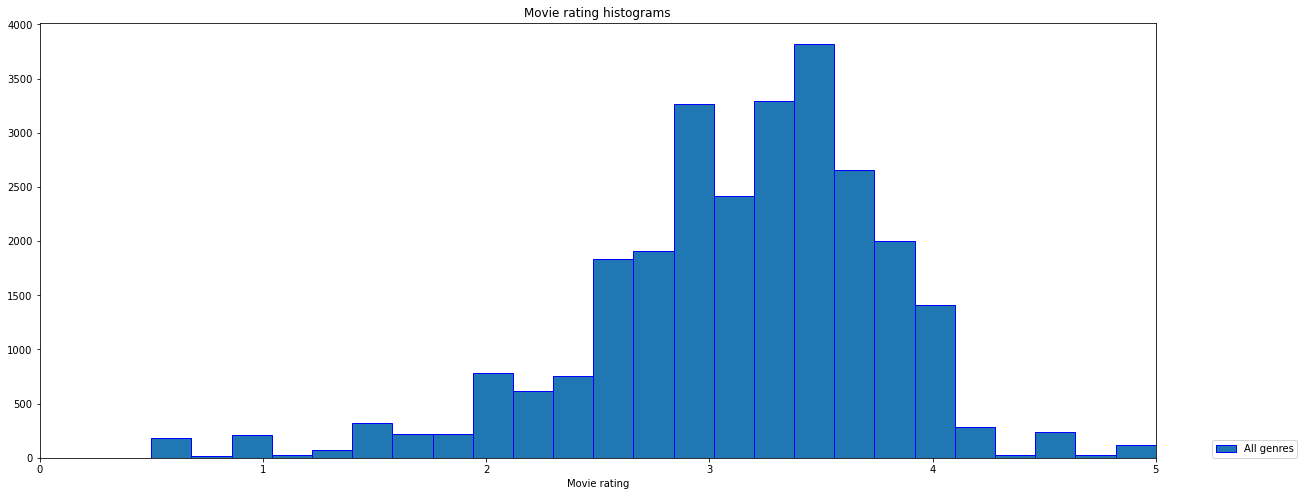

In [18]:
avg_rating.hist(bins=25, grid=False, edgecolor='b', label ='All genres', figsize=(20,8))
plt.legend(loc=(1.05,0), ncol=2)
plt.xlim(0,5)
plt.xlabel('Movie rating')
plt.title('Movie rating histograms')
plt.show()

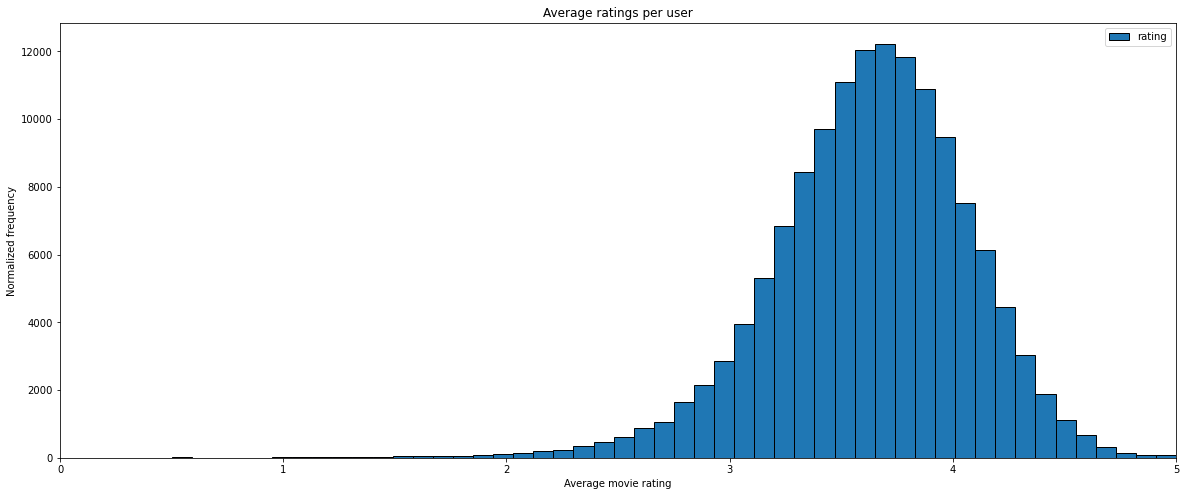

In [19]:
user_rating = rating[['userId','rating']].groupby('userId').mean()

# Plot histogram
user_rating.plot(kind='hist', bins=50, grid=0, edgecolor='black', figsize=(20,8))

plt.xlim(0,5)
plt.legend()
plt.xlabel ('Average movie rating')
plt.ylabel ('Normalized frequency')
plt.title ('Average ratings per user')
plt.show()

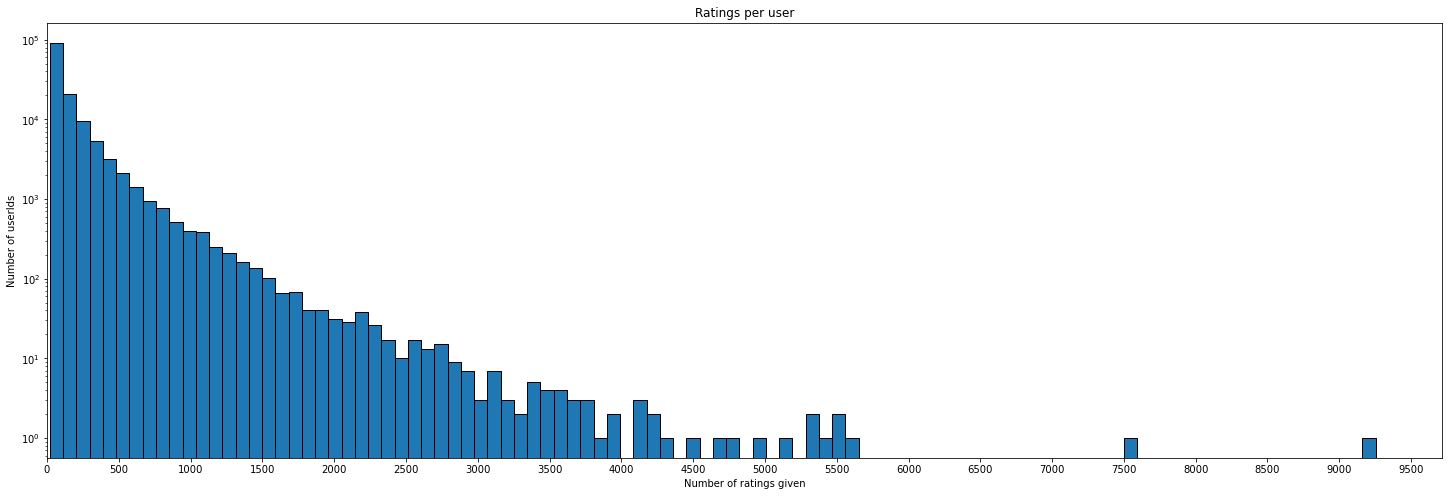

In [20]:
# Histogram of ratings counts.

user_rating = rating[['userId', 'movieId']].groupby('userId').count()
user_rating.columns=['num_ratings']

plt.figure(figsize=(25,8))
plt.hist(user_rating.num_ratings, bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of userIds')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,500))
plt.show()

<Figure size 1800x1080 with 0 Axes>

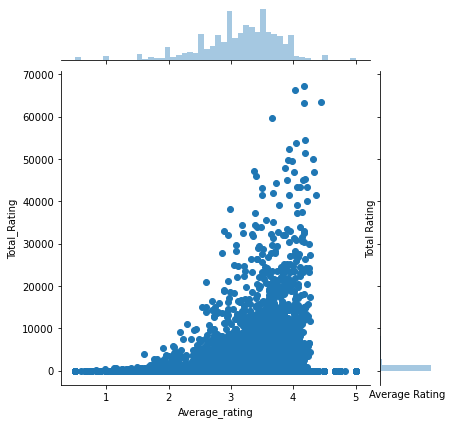

In [21]:
plt.figure(figsize=(25,15))
sns.jointplot(df.Average_rating, df.Total_Rating,)
plt.xlabel('Average Rating')
plt.ylabel('Total Rating')
plt.xlim(0,)
plt.show()

This graph is showing that Movies with higher rating actually have more number of ratings compared to movies with low average rating

as the data is too big we will only work with some of it but it can be applied to whole dataset as well.

In [22]:
data.shape

(20000263, 6)

In [23]:
new_data = data.iloc[0:15000000]
new_data.shape

(15000000, 6)

# Recommending Similar Movies

In [24]:
#sorting values according to num of rating column

movie_title = new_data.pivot_table(index='userId', columns = 'title', values='rating')

In [25]:
movie_title.head()

title,'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),...And Justice for All (1979),1-900 (06) (1994),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),102 Dalmatians (2000),"10th Victim, The (La decima vittima) (1965)",...,Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),Zone 39 (1997),"Zorro, the Gay Blade (1981)",eXistenZ (1999),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
movie_title.shape

(138474, 4675)

# Movie Recommendation System based on Movie

User can enter a movie name and number of recommendtion he want.

This system will recommend user the similar Movies on the basis of input.

Just try and Play with it.

In [29]:
def movie_recommendation():
    #Taking Movie as a Input on whose basic User want recommendation
    movie = input("Please Enter Movie Name : ")
    
    #How many Recommendation should be shown to user
    n = int(input("How many recommendation you need : "))

    #getting its rating from our data
    user_rating = movie_title[movie]
  
    #Finding Movies with similar rating
    similar_movie = movie_title.corrwith(user_rating)
    
    similar_movie = pd.DataFrame(similar_movie, columns =['Correlation']) 
    
    similar_movie = similar_movie.join(df['Total_Rating'])

    #Sorting related 
    rec_ = similar_movie.sort_values(by = ['Correlation', 'Total_Rating'], ascending=False)

    rec = pd.DataFrame(rec_)
    rec.drop_duplicates()
    print()
    print()
    print("Following are the {} Recommended Movies".format(n))

    return rec.head(n)

In [31]:
movie_recommendation()

Please Enter Movie Name : Fight Club (1999)
How many recommendation you need : 10


Following are the 10 Recommended Movies


,Correlation,Total_Rating
title,,
Fight Club (1999),1.000000,40106
Mascara (1999),1.000000,11
"Further Gesture, A (1996)",1.000000,8
"Autumn Heart, The (1999)",1.000000,5
Bird of Prey (1996),1.000000,29
"Sadness of Sex, The (1995)",0.987829,14
Somebody is Waiting (1996),0.961449,32
Punks (2000),0.927173,8
Frisk (1995),0.916178,35


# Now lets move on to recommend or search movie according to Average Mean based on Tag and Genre

In [32]:
genre_labels = set()
for s in movie['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))
    
genre_labels = list(genre_labels)
genre_labels

['Children',
 'Adventure',
 'IMAX',
 'Drama',
 'Crime',
 '(no genres listed)',
 'War',
 'Western',
 'Comedy',
 'Animation',
 'Musical',
 'Romance',
 'Documentary',
 'Thriller',
 'Mystery',
 'Film-Noir',
 'Sci-Fi',
 'Horror',
 'Fantasy',
 'Action']

## Visualizing Genres

In [33]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [34]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    
    for s in liste: 
        keyword_count[s] = 0
    
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): 
            continue
        
        for s in liste_keywords: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    
    return keyword_occurences, keyword_count

In [35]:
keyword_occurences, dum = count_word(movie, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

In [36]:
keyword_occurences[0:50]

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

In [37]:
words = dict()
for s in keyword_occurences:
    words[s[0]] = s[1]

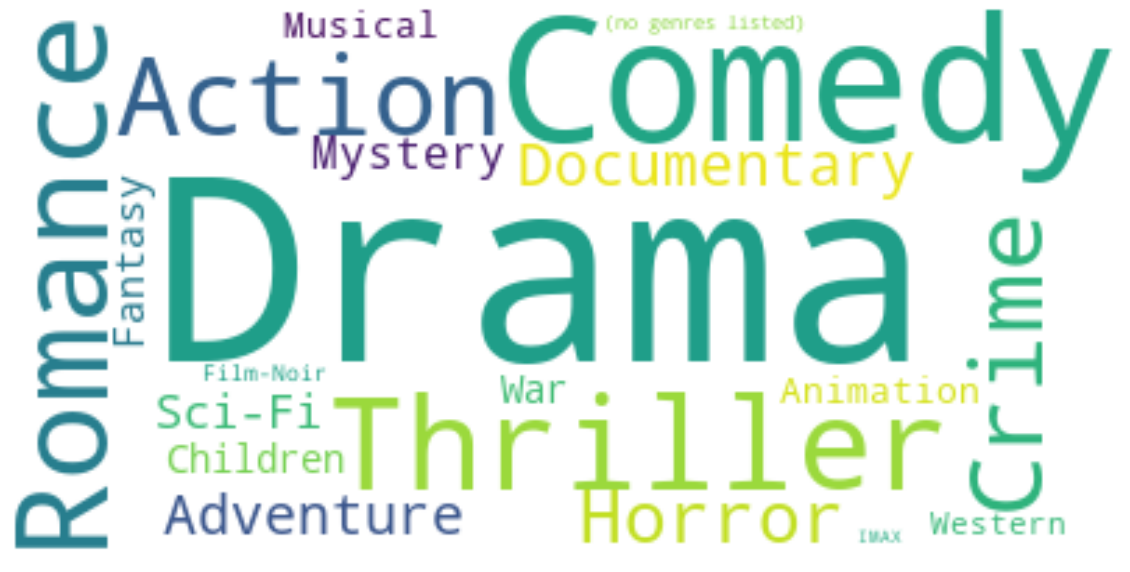

In [38]:
# instantiate a word cloud object
word_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
word_cloud.generate_from_frequencies(words)
plt.figure(figsize=(20,15))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

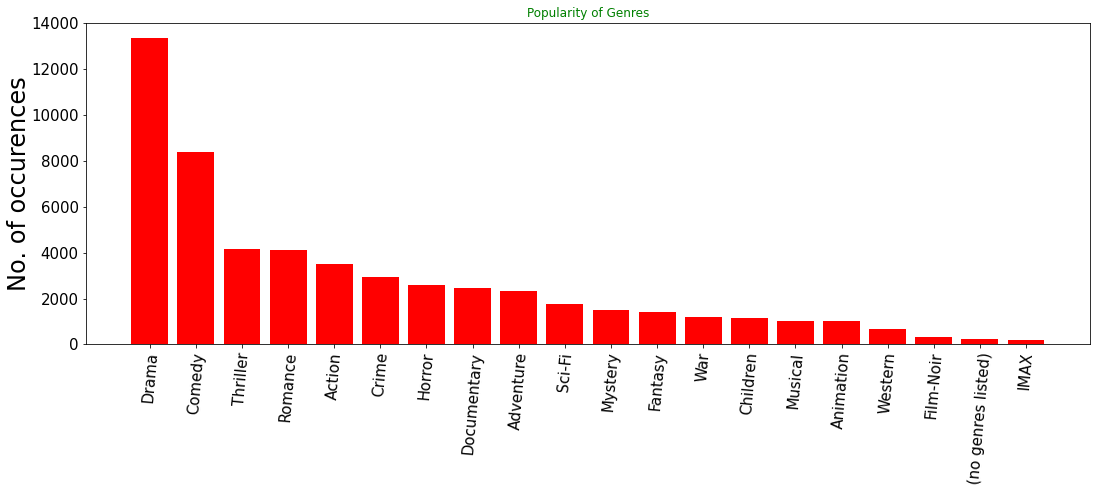

In [39]:
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]
x_label = [i[0] for i in keyword_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",color='g')
plt.show()

In [40]:
for i in genre_labels:
    movie[i] = movie.apply(lambda _:int(i in _.genres), axis = 1)

In [41]:
movie.head()

,movieId,title,genres,Children,Adventure,IMAX,Drama,Crime,(no genres listed),War,...,Musical,Romance,Documentary,Thriller,Mystery,Film-Noir,Sci-Fi,Horror,Fantasy,Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             27278 non-null  int64 
 1   title               27278 non-null  object
 2   genres              27278 non-null  object
 3   Children            27278 non-null  int64 
 4   Adventure           27278 non-null  int64 
 5   IMAX                27278 non-null  int64 
 6   Drama               27278 non-null  int64 
 7   Crime               27278 non-null  int64 
 8   (no genres listed)  27278 non-null  int64 
 9   War                 27278 non-null  int64 
 10  Western             27278 non-null  int64 
 11  Comedy              27278 non-null  int64 
 12  Animation           27278 non-null  int64 
 13  Musical             27278 non-null  int64 
 14  Romance             27278 non-null  int64 
 15  Documentary         27278 non-null  int64 
 16  Thriller            27

In [43]:
movie['movieId'] = movie['movieId'].astype(object)

In [44]:
avg_movieid_rating = pd.DataFrame(rating.groupby('movieId')['rating'].agg(['mean','count']))
avg_movieid_rating.head()

,mean,count
movieId,,
1,3.921240,49695
2,3.211977,22243
3,3.151040,12735
4,2.861393,2756
5,3.064592,12161


In [45]:
movies = pd.merge(avg_movieid_rating,movie,on='movieId')
movies.head()

,movieId,mean,count,title,genres,Children,Adventure,IMAX,Drama,Crime,...,Musical,Romance,Documentary,Thriller,Mystery,Film-Noir,Sci-Fi,Horror,Fantasy,Action
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
tags = pd.read_csv("../input/movielens-20m-dataset/tag.csv")
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [47]:
tags.shape

(465564, 4)

In [48]:
tags.nunique()

userId         7801
movieId       19545
tag           38643
timestamp    425373
dtype: int64

In [49]:
tags.drop(['timestamp'], axis=1, inplace=True)

## Visualizing Tags

In [50]:
tag_labels = [i for i in tags.tag.unique()]
tag_labels

['Mark Waters',
 'dark hero',
 'noir thriller',
 'bollywood',
 'screwball comedy',
 'mars',
 'neo-noir',
 'jesus',
 'dragon',
 'conspiracy theory',
 'treasure',
 'stranded',
 'Oscar (Best Foreign Language Film)',
 'New Zealand',
 'surreal',
 'unusual',
 'cute',
 'emotional',
 'girls who play boys',
 'Stephen Chow',
 'animation',
 'beautiful',
 'characters',
 'Disney',
 'feminist',
 'Ice',
 'music',
 'musical',
 'pacing',
 'royalty',
 'siblings',
 'storyline',
 'themes',
 'unnecessary villain',
 'voice acting',
 'writing',
 'dark comedy',
 'drugs',
 'Nudity (Full Frontal - Notable)',
 'Nudity (Full Frontal)',
 'Christopher Guest',
 'comedy',
 'music business',
 'rock and roll',
 'satire',
 'witty',
 'Nudity (Topless - Notable)',
 'Nudity (Topless)',
 'sexuality',
 'teen comedy',
 'College Humor',
 'R',
 'Ryan Reynolds',
 'Teen movie',
 'college',
 'Seann William Scott',
 'Vince Vaughn',
 'Will Ferrell',
 'Funniest Movies',
 'hilarious',
 'One of the worst movies of all time',
 'seen mor

In [51]:
tag_keyword_occurences, tag_dum = count_word(tags, 'tag', tag_labels)
tag_keyword_occurences

[['sci-fi', 3384],
 ['based on a book', 3281],
 ['atmospheric', 2917],
 ['comedy', 2779],
 ['action', 2657],
 ['surreal', 2427],
 ['BD-R', 2334],
 ['twist ending', 2323],
 ['funny', 2072],
 ['dystopia', 1991],
 ['stylized', 1941],
 ['quirky', 1906],
 ['dark comedy', 1899],
 ['classic', 1769],
 ['psychology', 1754],
 ['fantasy', 1703],
 ['time travel', 1549],
 ['romance', 1534],
 ['visually appealing', 1509],
 ['disturbing', 1487],
 ['aliens', 1428],
 ['thought-provoking', 1422],
 ['social commentary', 1417],
 ['Nudity (Topless)', 1400],
 ['violence', 1336],
 ['drugs', 1312],
 ['Criterion', 1286],
 ['true story', 1276],
 ['nudity (topless)', 1245],
 ['adventure', 1243],
 ['animation', 1229],
 ['imdb top 250', 1218],
 ['space', 1199],
 ['CLV', 1199],
 ['dark', 1194],
 ['superhero', 1171],
 ['black comedy', 1126],
 ['post-apocalyptic', 1116],
 ['World War II', 1116],
 ['Betamax', 1093],
 ['cult film', 1080],
 ['satire', 1068],
 ['tense', 1032],
 ['thriller', 1026],
 ['drama', 1010],
 ['pr

In [52]:
tag_words = dict()
tag_trunc_occurences = tag_keyword_occurences[0:50]
for s in tag_trunc_occurences:
    tag_words[s[0]] = s[1]

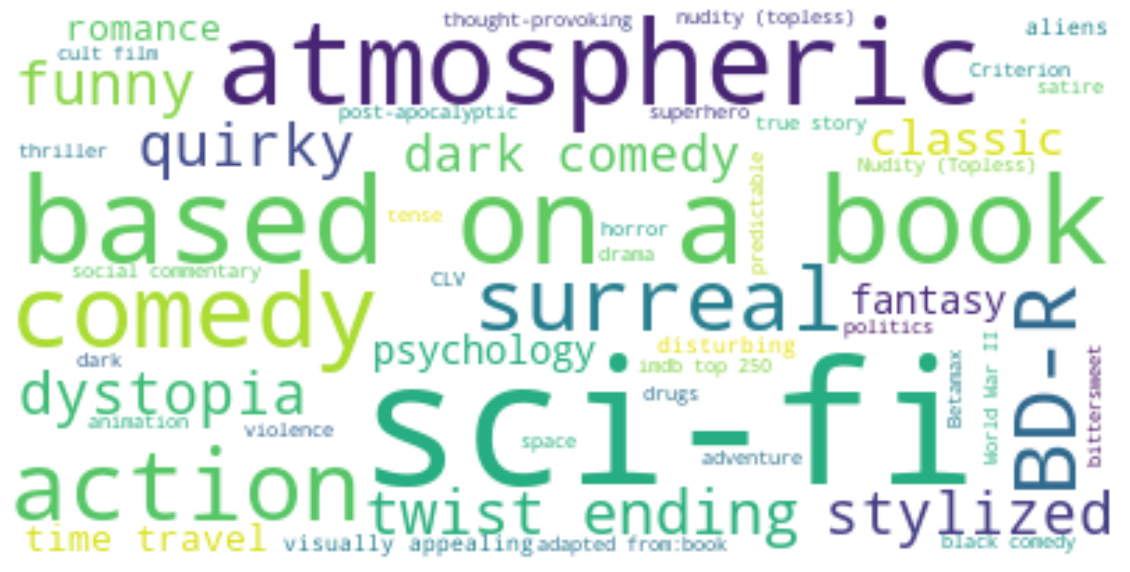

In [53]:
# instantiate a word cloud object
word_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
word_cloud.generate_from_frequencies(tag_words)
plt.figure(figsize=(20,15))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

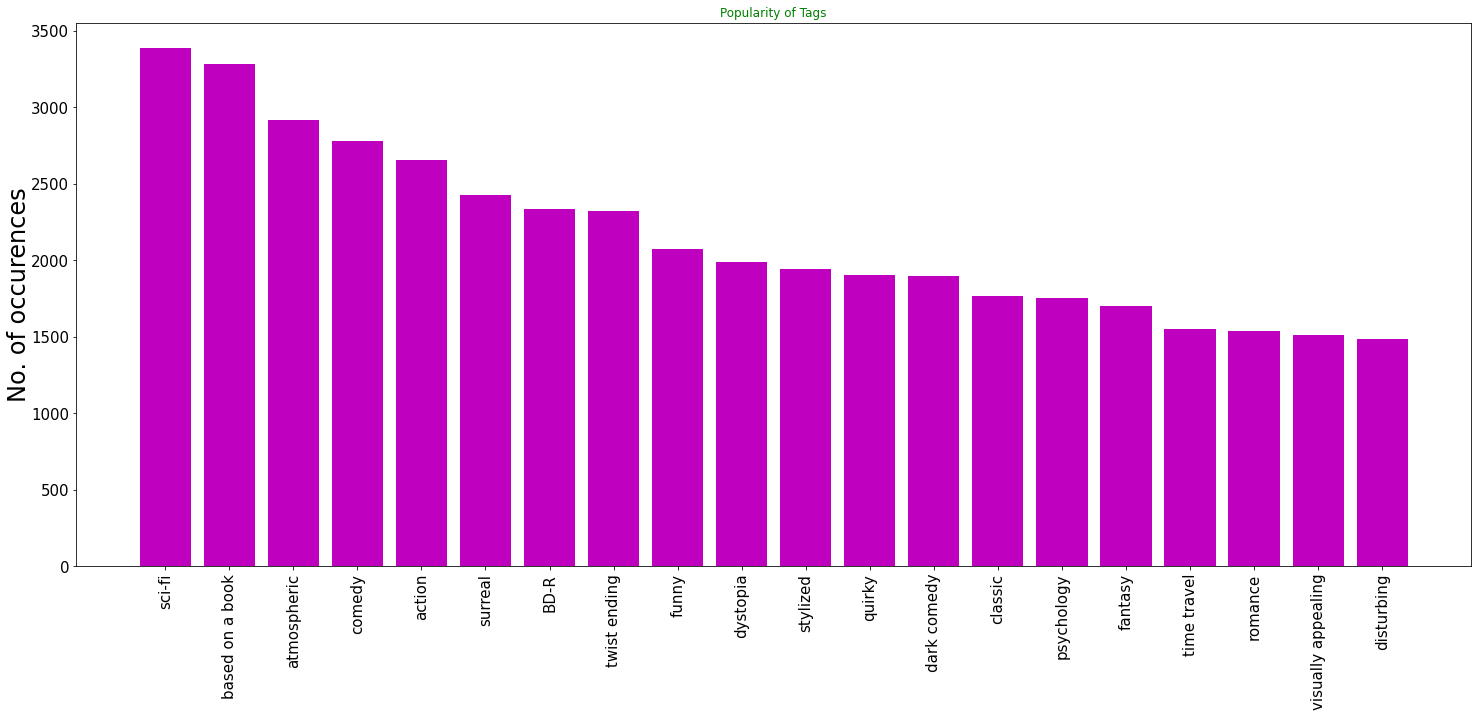

In [54]:
fig = plt.figure(1, figsize=(25,22))
ax2 = fig.add_subplot(2,1,2)
tag_trunc_occurences = tag_keyword_occurences[0:20]

y_axis = [i[1] for i in tag_trunc_occurences]
x_axis = [k for k,i in enumerate(tag_trunc_occurences)]
x_label = [i[0] for i in tag_trunc_occurences]
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='m')
plt.title("Popularity of Tags",color='g')
plt.show()

In [55]:
movies = pd.merge(movies,tags,on='movieId')
movies.head()

,movieId,mean,count,title,genres,Children,Adventure,IMAX,Drama,Crime,...,Documentary,Thriller,Mystery,Film-Noir,Sci-Fi,Horror,Fantasy,Action,userId,tag
0,1,3.92124,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1644,Watched
1,1,3.92124,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1741,computer animation
2,1,3.92124,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1741,Disney animated feature
3,1,3.92124,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1741,Pixar animation
4,1,3.92124,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1741,TÃ©a Leoni does not star in this movie


In [56]:
movies.shape

(464804, 27)

# Now we can recommend movie according to Genre based on average mean 

In [57]:
def movie_by_genre():
    genre = input("Please enter genre : ")
    n = int(input("Please enter Number of Recommendation you want : "))
    
    df = pd.DataFrame(movies.loc[(movies[genre]==1)].sort_values(['mean'], ascending=False)[['title', 'genres', 'count','mean']])
    df = df.drop_duplicates()
    
    return df[:n]

In [58]:
movie_by_genre()

Please enter genre : Comedy
Please enter Number of Recommendation you want : 10


,title,genres,count,mean
460334,Loser Takes All! (Qui perd gagne !) (2003),Comedy|Mystery,1,5.000000
463709,Doggiewoggiez! Poochiewoochiez! (2012),Comedy,1,5.000000
447361,Flight of the Conchords: A Texan Odyssey (2006),Comedy,1,5.000000
459896,Going Down in LA-LA Land (2011),Comedy|Drama|Romance,1,5.000000
409965,"Foster Brothers, The (Süt kardesler) (1976)",Comedy,1,5.000000
437571,Shaolin Temple 2: Kids from Shaolin (Shao Lin ...,Action|Comedy,1,5.000000
437327,"Octopus, The (Le poulpe) (1998)",Comedy|Crime|Thriller,3,4.833333
435860,Step Up Love Story (Futari ecchi) (2002),Animation|Comedy|Romance,2,4.750000
349152,Supermarket Woman (Sûpâ no onna) (1996),Comedy,2,4.750000
381639,Out 1: Spectre (1974),Comedy|Drama|Thriller,2,4.750000


# Now we can recommend movie according to Tag based on average mean

In [59]:
def movie_by_tag():
    tag = input("Please enter tag : ")
    n = int(input("Please enter Number of Recommendation you want : "))
    
    df = pd.DataFrame(movies.loc[(movies['tag']==tag)].sort_values(['mean'], ascending=False)[['tag', 'title','count','mean']])
    df = df.drop_duplicates()
    
    return df[:n]

In [60]:
movie_by_tag()

Please enter tag : Watched
Please enter Number of Recommendation you want : 10


,tag,title,count,mean
53410,Watched,One Flew Over the Cuckoo's Nest (1975),29932,4.248079
130048,Watched,Fight Club (1999),40106,4.227123
115394,Watched,"Matrix, The (1999)",51334,4.187186
187902,Watched,Rashomon (Rashômon) (1950),3712,4.176724
14851,Watched,Pulp Fiction (1994),67310,4.174231
51417,Watched,Monty Python and the Holy Grail (1975),33024,4.174146
393019,Watched,Inception (2010),14023,4.156172
145168,Watched,Modern Times (1936),3732,4.143087
226484,Watched,"Lord of the Rings: The Return of the King, The...",31577,4.142382
182568,Watched,"Lord of the Rings: The Fellowship of the Ring,...",37553,4.137925


# Here we can recommend movie according to Genre and Tags based on average mean

In [61]:
def movie_by_tag_genre():
    genre = input("Please enter Genre : ")
    tag = input("Please enter tag : ")
    n = int(input("Please enter Number of Recommendation you want : "))
    
    df = pd.DataFrame(movies.loc[(movies['tag']==tag) & (movies[genre]==1)].sort_values(['mean'], ascending=False)[['tag', 'title', 'genres', 'count','mean']])
    df = df.drop_duplicates()
    
    return df[:n]

In [62]:
movie_by_tag_genre()

Please enter Genre : Comedy
Please enter tag : Watched
Please enter Number of Recommendation you want : 10


,tag,title,genres,count,mean
14851,Watched,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,67310,4.174231
51417,Watched,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,33024,4.174146
145168,Watched,Modern Times (1936),Comedy|Drama|Romance,3732,4.143087
159283,Watched,Snatch (2000),Comedy|Crime|Thriller,17617,4.042147
20298,Watched,Forrest Gump (1994),Comedy|Drama|Romance|War,66172,4.029000
376907,Watched,Mary and Max (2009),Animation|Comedy|Drama,1334,3.995127
455167,Watched,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2230,3.992152
114734,Watched,"Lock, Stock & Two Smoking Barrels (1998)",Comedy|Crime|Thriller,15325,3.988679
48361,Watched,Monty Python's Life of Brian (1979),Comedy,20557,3.981126
299796,Watched,Little Miss Sunshine (2006),Adventure|Comedy|Drama,11878,3.922083
